In [33]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [34]:
# This command displays Matplotlib plots directly below the code cell 
 
%matplotlib inline

In [35]:
# Create a path to make it easier to import files
path = r'/Users/Luca2/Documents/Dropbox/Mein Mac (Air-von-Luca.fritz.box)/Desktop/World Happiness Report'

In [36]:
# Import data set
df = pd.read_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'df_clean.pkl'))

In [37]:
df.head()

,Country,Region,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption,Happiness Category
0,Finland,Western Europe,2018,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,High Happiness
1,Norway,Western Europe,2018,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,High Happiness
2,Denmark,Western Europe,2018,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,High Happiness
3,Iceland,Western Europe,2018,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,High Happiness
4,Switzerland,Western Europe,2018,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,High Happiness


# 02. Data wrangling

In [38]:
# Create a subset with only numerical values 

df_sub = df.drop(columns = ['Country', 'Region', 'Happiness Category'])

In [39]:
df_sub.shape

(895, 9)

In [40]:
df_sub.head()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption
0,2018,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2018,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2018,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,2018,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,2018,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# 03. Using Elbow Technique

In [41]:
# Defines the range of potential clusters in the data
num_cl = range(1, 10) 
# Definess k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [42]:
# Rate of variation for each cluster option
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]

/Users/Luca2/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Luca2/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Luca2/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Luca2/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

In [43]:
score

[-1690524.012326025,
 -429712.3501986745,
 -194098.1630304949,
 -111732.55606907533,
 -72959.03918862776,
 -51810.327635957714,
 -39049.716267383184,
 -30456.846221619235,
 -24726.757626198356]

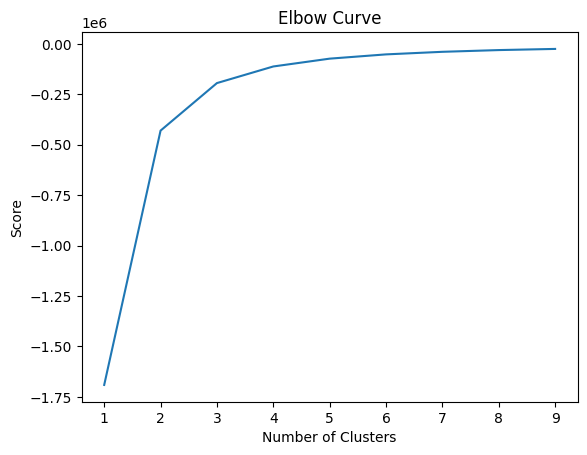

In [44]:
# Plot the scores on a chart using pylab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


### The elbow is where the curve begins to flatten out. There is a significant increase from to 2 (number of clusters) to 3, but the curve flattens from 3 to 4. The optimal count for my cluster is therefore 3.

# 04. K-means Clustering 

In [45]:
# Create the k-means object
kmeans = KMeans (n_clusters=3)

In [46]:
# Fit the k-means object to the data
kmeans. fit (df_sub)

/Users/Luca2/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [47]:
# To view the clusters create a column in the dataframe with
# values corresponding to which cluster every observation belongs

df_sub['clusters'] = kmeans.fit_predict(df_sub)

/Users/Luca2/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
# Check the new column
df_sub.head()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption,clusters
0,2018,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,1
1,2018,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,1
2,2018,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,1
3,2018,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,1
4,2018,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,1


In [49]:
# Check how many observations fall into each cluster

df_sub['clusters'].value_counts()

1    305
0    299
2    291
Name: clusters, dtype: int64

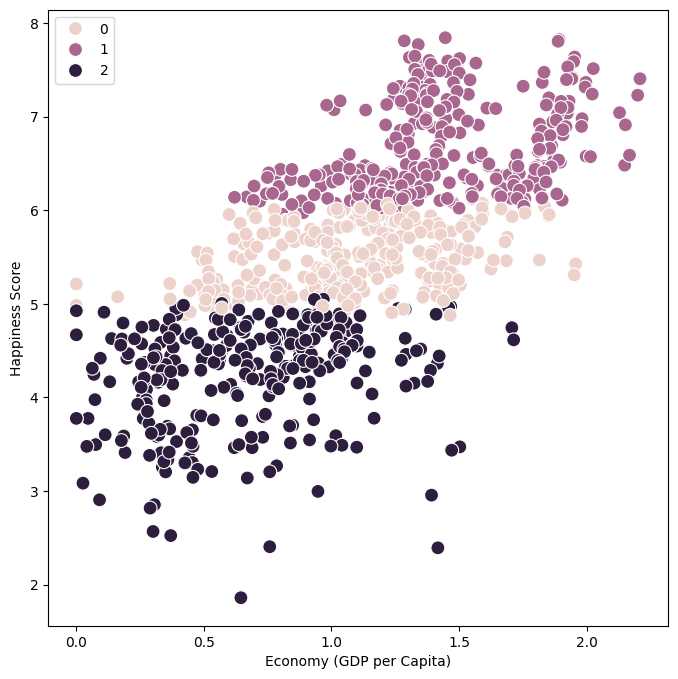

In [50]:
# Plot the clusters for 'Economy (GDP per Capita)' and 'Happiness Score'
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = df_sub['Economy (GDP per Capita)'], y = df_sub['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

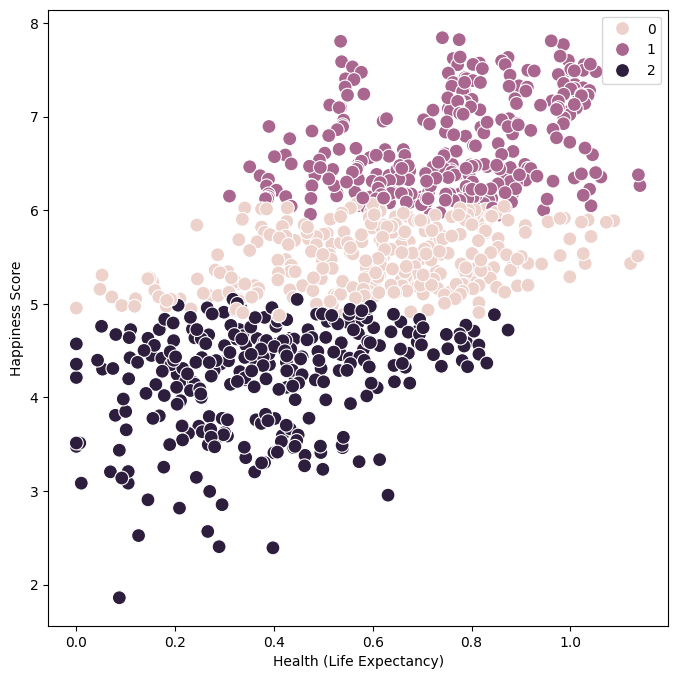

In [51]:
# Plot the clusters for 'Health (Life Expectancy)' and 'Happiness Score'
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = df_sub['Health (Life Expectancy)'], y = df_sub['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()

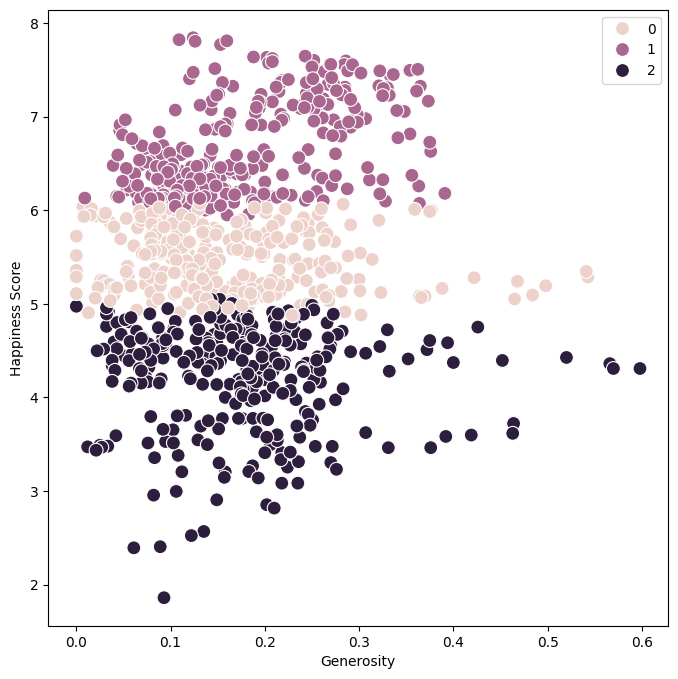

In [52]:
# Plot the clusters for 'Generosity' and 'Happiness Score'
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = df_sub['Generosity'], y = df_sub['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

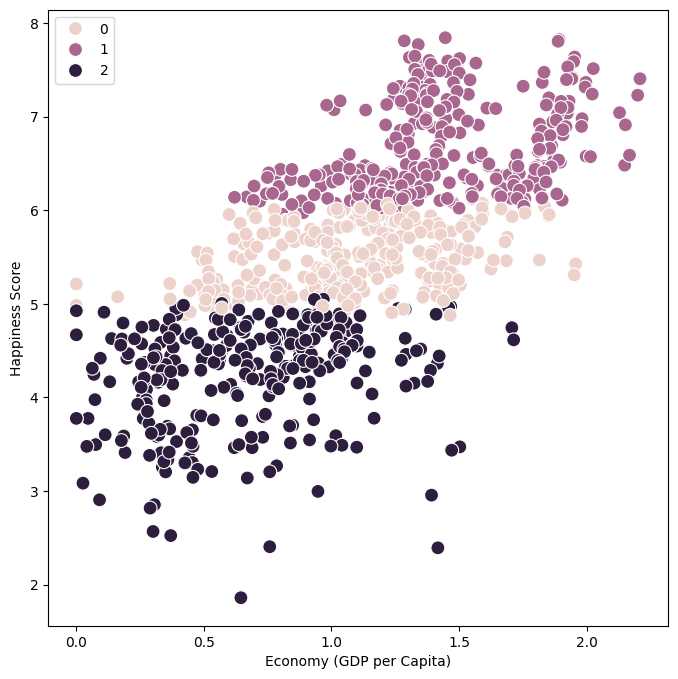

In [53]:
# Plot the clusters for 'Freedom (Life Choices)' and 'Happiness Score'
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = df_sub['Freedom (Life Choices)'], y = df_sub['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Freedom (Life Choices)')
plt.ylabel('Happiness Score')
plt.show()

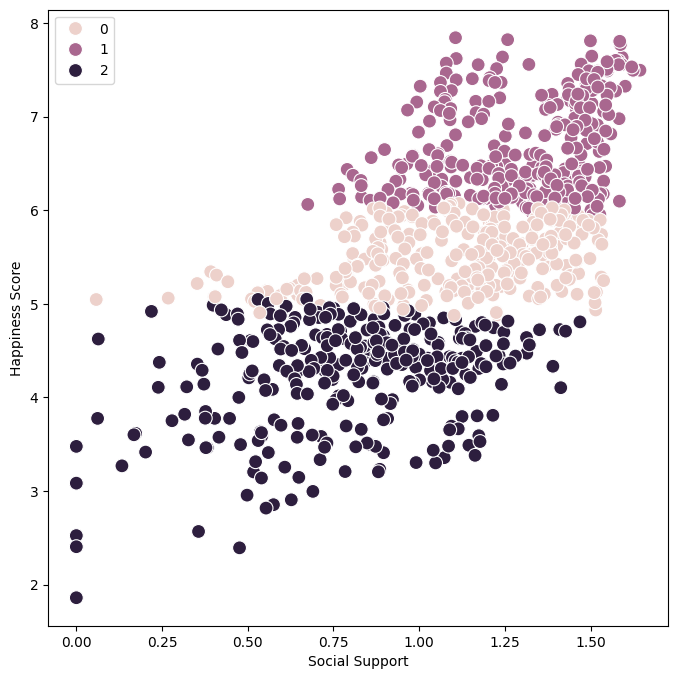

In [54]:
# Plot the clusters for 'Social Support' and 'Happiness Score'
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = df_sub['Social Support'], y = df_sub['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

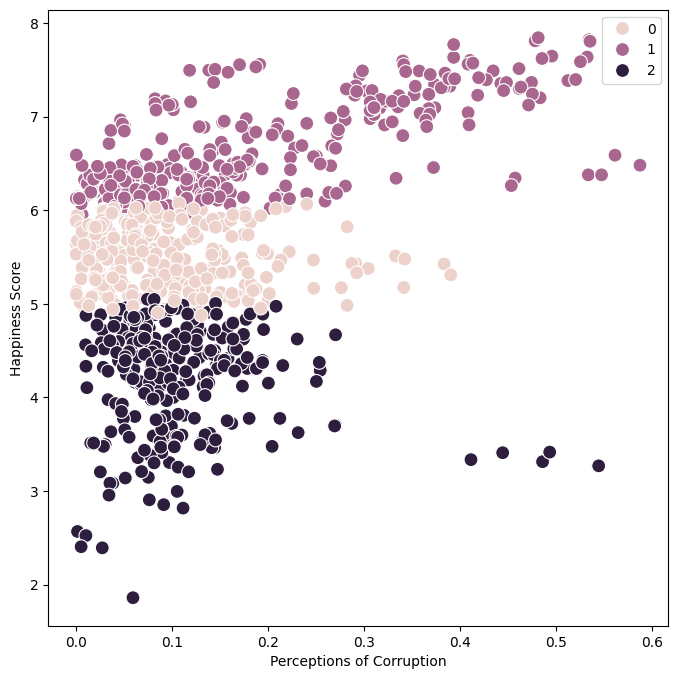

In [55]:
# Plot the clusters for 'Perceptions of Corruption' and 'Happiness Score'
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = df_sub['Perceptions of Corruption'], y = df_sub['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Happiness Score')
plt.show()

## Plot Analysis: 

### The clusters can be divided into two groups. In the first group, there would be Economy, Health, Freedom, and Social Support, while in the second group, there would be Generosity and Perceptions of Corruption. 

### The first group exhibits a typical form of a positive linear relationship, at least in its basic features. Following to the right on the x-axis, as this variable increases, the data points on the y-axis are generally higher. The most unusual shape in this group is observed in social support, where the clusters a arranged less linearly compared to the others, forming a small curve, somewhat resembling the graph of an exponential function. A notable distinction can be observed here in comparison to the other variables in their group, particularly as the lower cluster extends widely, and the upper two clusters are closer together.

### In the case of Generosity and Perceptions of Corruption, a general linear-like function cannot be identified. It is noticeable that the level of generosity does not increase with a higher Happiness Score cluster. The individual clusters portray a similar level of generosity across different levels of happiness. 

### Regarding perceptions of corruption, this is generally similar, with the exception that in the cluster group with the highest Happiness Score, there are some outliers that also have a high score when it comes to Perceptions of Corruption.

# 05. Descriptive Statistics

In [59]:
# Create a 'cluster' column based on the clusters 
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark-purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [63]:
# Group the 'cluster' column and aggregate its mean and median for each colour
df_sub.groupby('cluster').agg({
    'Economy (GDP per Capita)': ['mean', 'median'],
    'Social Support': ['mean', 'median'],
    'Health (Life Expectancy)': ['mean', 'median'],
    'Freedom (Life Choices)': ['mean', 'median'],
    'Generosity': ['mean', 'median'], 
    'Perceptions of Corruption': ['mean', 'median']
})


Economy (GDP per Capita)        Social Support         \
                                mean median           mean median   
cluster                                                             
dark-purple                 0.675235  0.670       0.801096  0.819   
pink                        1.072955  1.060       1.106729  1.163   
purple                      1.432535  1.376       1.302928  1.357   

            Health (Life Expectancy)        Freedom (Life Choices)         \
                                mean median                   mean median   
cluster                                                                     
dark-purple                 0.387656  0.381               0.374191  0.384   
pink                        0.608388  0.622               0.474646  0.492   
purple                      0.753548  0.771               0.574972  0.586   

            Generosity        Perceptions of Corruption         
                  mean median                      mean median  
cluster                                                         
dark-purple   0.177936  0.176                  0.102499  0.087  
pink          0.159006  0.138                  0.093847  0.077  
purple        0.179872  0.160                  0.194692  0.149

### This additional breakdown doesn't provide much additional information compared to the visualizations and statistics created so far. It can be said that the purple cluster has the highest median and mean for all variables. The pink cluster is ahead of the dark purple cluster in most categories, with the exceptions of generosity and perceptions of corruption. 

### This has nothing to do with any of the initial hypotheses, but it can provide additional information. One could infer that people from states with lower happiness (which also have a low per capita income) are more reliant on assitance, and therefore, individuals from poorer states try to support each other more compared to those from counries that are average in terms of happiness and prosperity. This is a possible interpretation, but it is highly speculative and not easily verifiable without further analysis.

### There is also a significant percentage difference in the values of perception of corruption in the purple clusters compared to the others, as observed on the graph earlier.

### On the other hand, something that could support the previously made hypothesis, is that the proportional difference of the purple clusters to the other clusters in the category of Economy is larger than in the other categories (except corruption). This unique position of the happiest states can be an additional indicator of the special role of GDP per Capita when it comes to happiness. However, this should by no means be taken as the sole indicator, as the proportional difference is also significant in the Perception of Ccorruption, and as previously tested, there is not a particularly strong correlation between this variable and the Happiness Score.

In [64]:
df_sub.to_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'df_sub_cluster.pkl'))